Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Importing the bikes data

In [2]:
bikes = pd.read_csv('day.csv')

In [3]:
bikes.shape

(730, 16)

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# No missing values in dataset
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# dropping casual and registered columns as these are not features(dependent or independent variable)
bikes = bikes.drop(columns= ['casual', 'registered'])

In [8]:
# dropping instant(column number) and dteday(yr and month data already available in diff. column) 
# columns as these are not required for model building
bikes = bikes.drop(columns= ['instant', 'dteday'])

In [9]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Channging categorical columns integer values to string for univariate analysis

In [10]:
# 1:"spring", 2:"summer", 3:"fall", 4:"winter" as per readme.txt
varlist = ['season']
bikes[varlist] = bikes[varlist].apply(lambda x: x.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"}))
bikes[varlist].head()

,season
0,spring
1,spring
2,spring
3,spring
4,spring


In [11]:
bikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
varlist = ['mnth']
bikes[varlist] = bikes[varlist].apply(lambda x: x.map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}))
bikes[varlist].head()

,mnth
0,Jan
1,Jan
2,Jan
3,Jan
4,Jan


In [13]:
varlist = ['weekday']
bikes[varlist] = bikes[varlist].apply(lambda x: x.map({1:"Mon", 2:"Tues", 3:"Wed", 4:"Thrus", 5:"Fri", 6:"Sat", 0:"Sun"}))
bikes[varlist].head()

,weekday
0,Sat
1,Sun
2,Mon
3,Tues
4,Wed


In [14]:
varlist = ['weathersit']
bikes[varlist] = bikes[varlist].apply(lambda x: x.map({1:"Clear", 2:"Mist", 3:"Light snow", 4:"Heavy rain"}))
bikes[varlist].head()

,weathersit
0,Mist
1,Mist
2,Clear
3,Clear
4,Clear


In [15]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


*Analysing for outliers in numerical column*

In [16]:
bikes.temp.value_counts()

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64

In [17]:
bikes.atemp.value_counts()

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: atemp, Length: 689, dtype: int64

In [18]:
bikes.hum.value_counts()

61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: hum, Length: 594, dtype: int64

In [19]:
bikes.windspeed.value_counts()

9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064     3
            ..
12.416775    1
13.833289    1
14.250632    1
23.044181    1
10.374682    1
Name: windspeed, Length: 649, dtype: int64

There is no outliers present in any of the numeric columns

*Segmenting numeric column values*

In [20]:
pd.cut(bikes['temp'], bins=5, precision=0)

0      (9.0, 16.0]
1      (9.0, 16.0]
2       (2.0, 9.0]
3       (2.0, 9.0]
4      (9.0, 16.0]
          ...     
725    (9.0, 16.0]
726    (9.0, 16.0]
727    (9.0, 16.0]
728    (9.0, 16.0]
729     (2.0, 9.0]
Name: temp, Length: 730, dtype: category
Categories (5, interval[float64, right]): [(2.0, 9.0] < (9.0, 16.0] < (16.0, 22.0] < (22.0, 29.0] < (29.0, 35.0]]

In [21]:
bikes['temp_groups'] = pd.cut(bikes['temp'], bins=5, precision=0, labels=['2-9','9-16','16-22', '22-29', '29-35'])

In [22]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_groups
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,9-16
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,9-16
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2-9
3,spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2-9
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,9-16


In [23]:
pd.cut(bikes['atemp'], bins=5, precision=0)

0      (12.0, 19.0]
1      (12.0, 19.0]
2       (4.0, 12.0]
3       (4.0, 12.0]
4       (4.0, 12.0]
           ...     
725     (4.0, 12.0]
726    (12.0, 19.0]
727    (12.0, 19.0]
728    (12.0, 19.0]
729     (4.0, 12.0]
Name: atemp, Length: 730, dtype: category
Categories (5, interval[float64, right]): [(4.0, 12.0] < (12.0, 19.0] < (19.0, 27.0] < (27.0, 34.0] < (34.0, 42.0]]

In [24]:
bikes['atemp_groups'] = pd.cut(bikes['atemp'], bins=5, precision=0, labels=['4-12','12-19','19-27', '27-34', '34-42'])
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_groups,atemp_groups
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,9-16,12-19
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,9-16,12-19
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2-9,4-12
3,spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2-9,4-12
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,9-16,4-12


In [25]:
pd.cut(bikes['hum'], bins=5, precision=0)

0      (78.0, 97.0]
1      (58.0, 78.0]
2      (39.0, 58.0]
3      (58.0, 78.0]
4      (39.0, 58.0]
           ...     
725    (58.0, 78.0]
726    (58.0, 78.0]
727    (58.0, 78.0]
728    (39.0, 58.0]
729    (39.0, 58.0]
Name: hum, Length: 730, dtype: category
Categories (5, interval[float64, right]): [(-0.1, 19.0] < (19.0, 39.0] < (39.0, 58.0] < (58.0, 78.0] < (78.0, 97.0]]

In [26]:
bikes['hum_groups'] = pd.cut(bikes['hum'], bins=5, precision=0, labels=['-0.1-19','19-39','39-58', '58-78', '78-97'])
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_groups,atemp_groups,hum_groups
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,9-16,12-19,78-97
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,9-16,12-19,58-78
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2-9,4-12,39-58
3,spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2-9,4-12,58-78
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,9-16,4-12,39-58


In [27]:
pd.cut(bikes['windspeed'], bins=5, precision=0)

0       (8.0, 15.0]
1      (15.0, 21.0]
2      (15.0, 21.0]
3       (8.0, 15.0]
4       (8.0, 15.0]
           ...     
725    (21.0, 28.0]
726     (8.0, 15.0]
727     (8.0, 15.0]
728    (21.0, 28.0]
729     (8.0, 15.0]
Name: windspeed, Length: 730, dtype: category
Categories (5, interval[float64, right]): [(1.0, 8.0] < (8.0, 15.0] < (15.0, 21.0] < (21.0, 28.0] < (28.0, 34.0]]

In [28]:
bikes['windspeed_groups'] = pd.cut(bikes['windspeed'], bins=5, precision=0, labels=['1-8','8-15','15-21', '21-28', '28-34'])
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_groups,atemp_groups,hum_groups,windspeed_groups
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,9-16,12-19,78-97,8-15
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,9-16,12-19,58-78,15-21
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2-9,4-12,39-58,15-21
3,spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2-9,4-12,58-78,8-15
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,9-16,4-12,39-58,8-15


*Univariate Analysis*

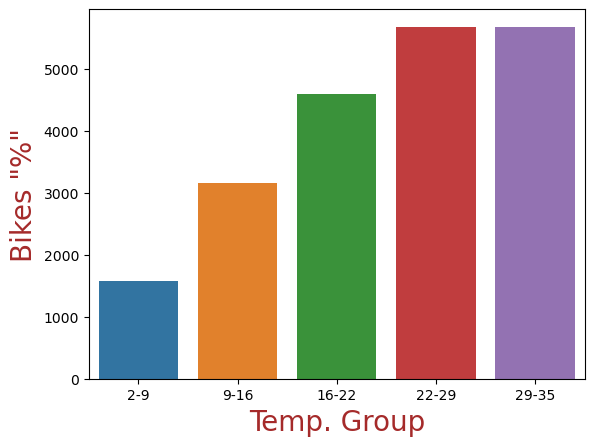

In [29]:
sns.barplot( x="temp_groups", y="cnt", data=bikes, errorbar=None)
fontDict={"fontsize":20, "fontweight": 5, "color": "Brown"}
plt.xlabel("Temp. Group", fontdict=fontDict)
plt.ylabel('Bikes "%"', fontdict=fontDict)
plt.show()

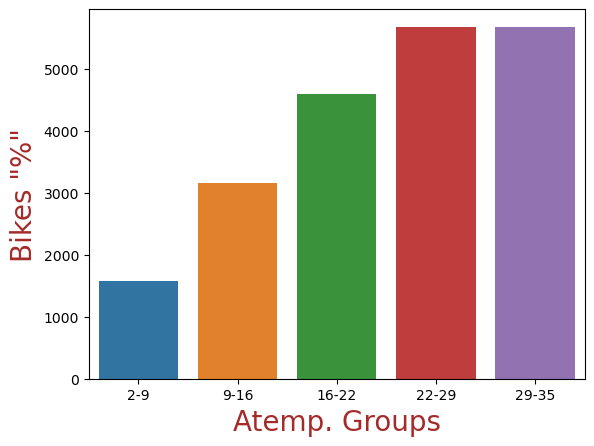

In [30]:
sns.barplot( x="temp_groups", y="cnt", data=bikes, errorbar=None)
fontDict={"fontsize":20, "fontweight": 5, "color": "Brown"}
plt.xlabel("Atemp. Groups", fontdict=fontDict)
plt.ylabel('Bikes "%"', fontdict=fontDict)
plt.show()

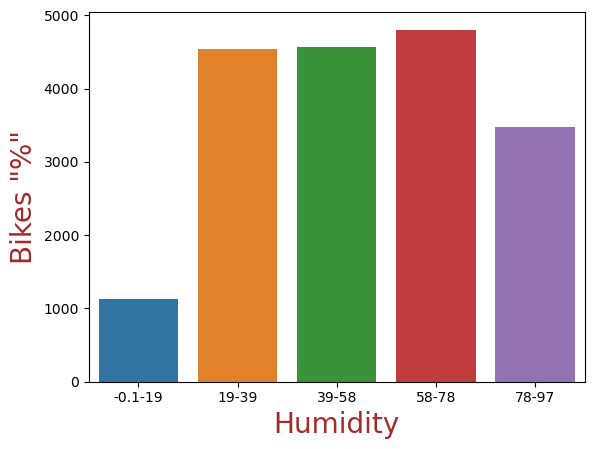

In [31]:
sns.barplot( x="hum_groups", y="cnt", data=bikes, errorbar=None)
plt.xlabel("Humidity", fontdict=fontDict)
plt.ylabel('Bikes "%"', fontdict=fontDict)
plt.show()

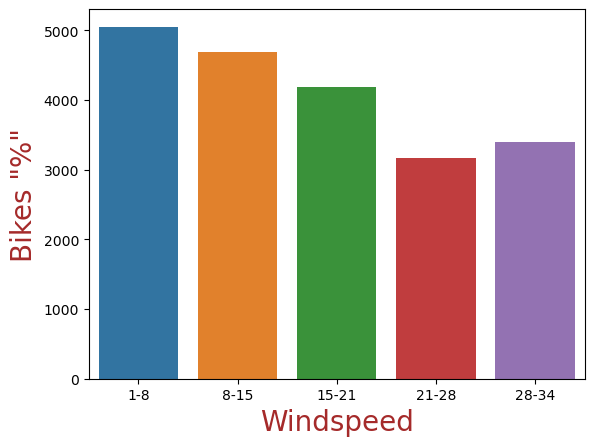

In [32]:
sns.barplot( x="windspeed_groups", y="cnt", data=bikes, errorbar=None)
fontDict={"fontsize":20, "fontweight": 5, "color": "Brown"}
plt.xlabel("Windspeed", fontdict=fontDict)
plt.ylabel('Bikes "%"', fontdict=fontDict)
plt.show()

All the numeric columns are showing a trend for bikes count, hence need to consider all for model building

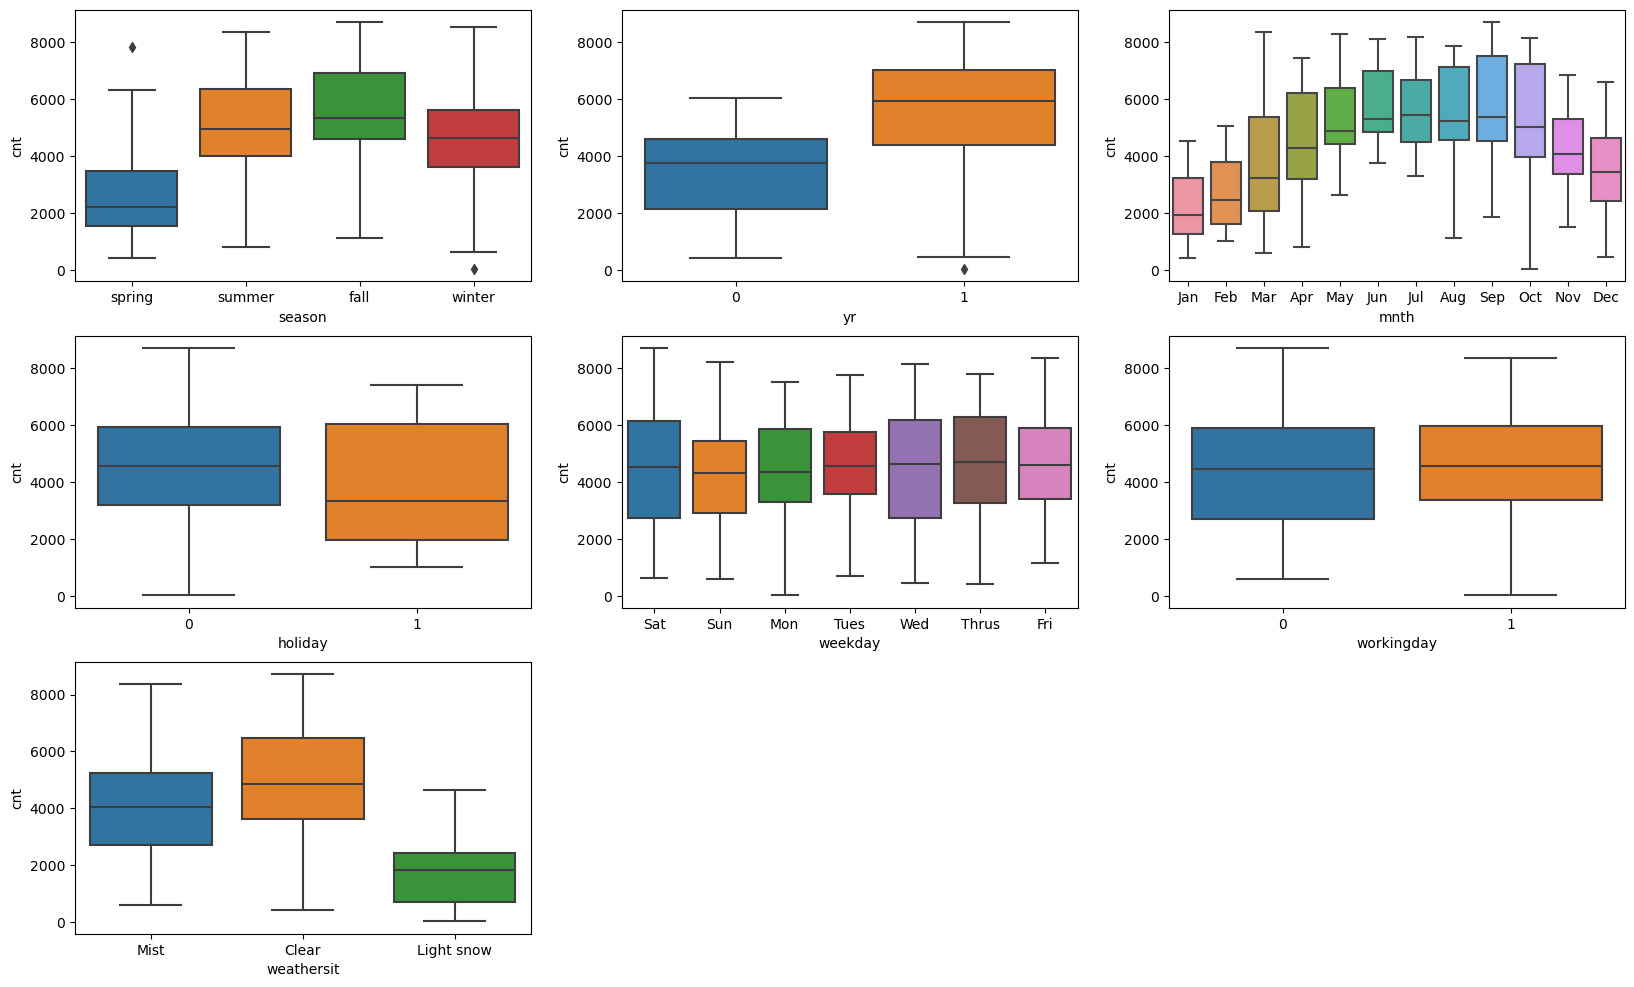

In [33]:
# Visualise categorical variable
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bikes)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bikes)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bikes)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=bikes)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=bikes)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bikes)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=bikes)
plt.show()

For weekday and workingday the medians are nearly same.
Rest of the features showing different median for different values

*Bivariate analysis*

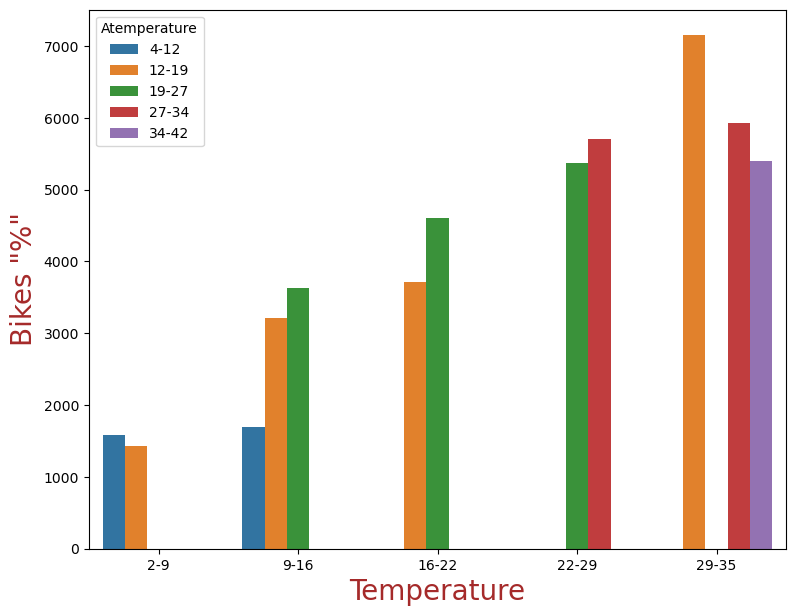

In [34]:
plt.figure(figsize=(9,7))
sns.barplot(x="temp_groups", y="cnt", hue="atemp_groups", data=bikes, errorbar=None)
plt.xlabel("Temperature", fontdict=fontDict)
plt.ylabel('Bikes "%"', fontdict=fontDict)
plt.legend(title='Atemperature')
plt.show()

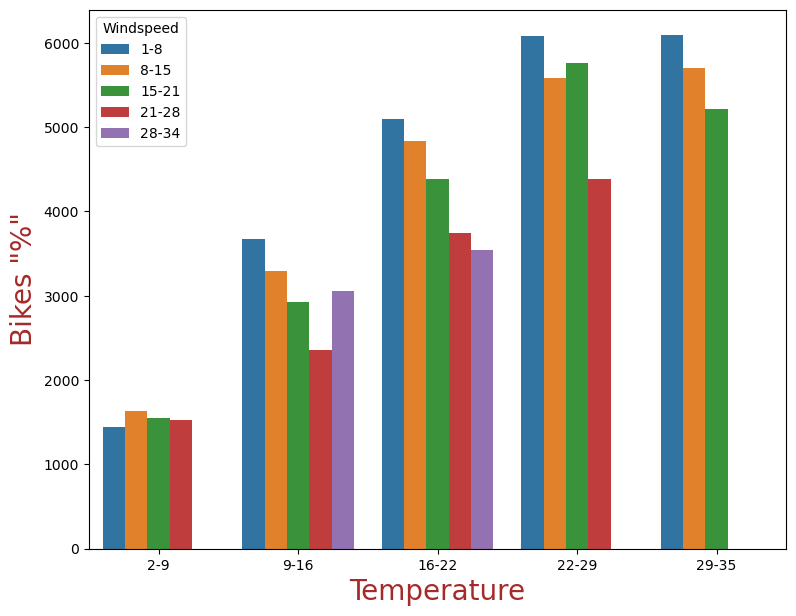

In [35]:
plt.figure(figsize=(9,7))
sns.barplot(x="temp_groups", y="cnt", hue="windspeed_groups", data=bikes, errorbar=None)
plt.xlabel("Temperature", fontdict=fontDict)
plt.ylabel('Bikes "%"', fontdict=fontDict)
plt.legend(title='Windspeed')
plt.show()

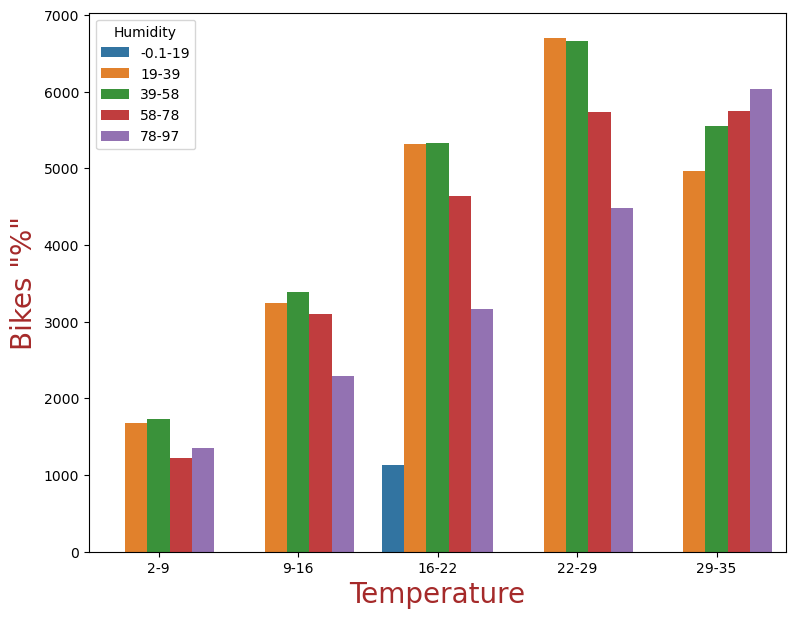

In [36]:
plt.figure(figsize=(9,7))
sns.barplot(x="temp_groups", y="cnt", hue="hum_groups", data=bikes, errorbar=None)
plt.xlabel("Temperature", fontdict=fontDict)
plt.ylabel('Bikes "%"', fontdict=fontDict)
plt.legend(title='Humidity')
plt.show()

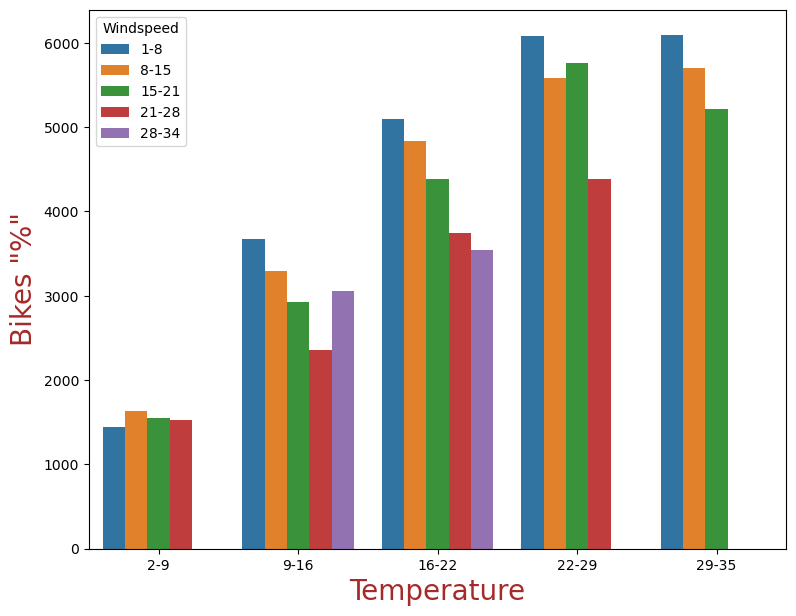

In [37]:
plt.figure(figsize=(9,7))
sns.barplot(x="temp_groups", y="cnt", hue="windspeed_groups", data=bikes, errorbar=None)
plt.xlabel("Temperature", fontdict=fontDict)
plt.ylabel('Bikes "%"', fontdict=fontDict)
plt.legend(title='Windspeed')
plt.show()

In [ ]:
sns.pairplot(bikes, x_vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'], y_vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])

<Axes: >

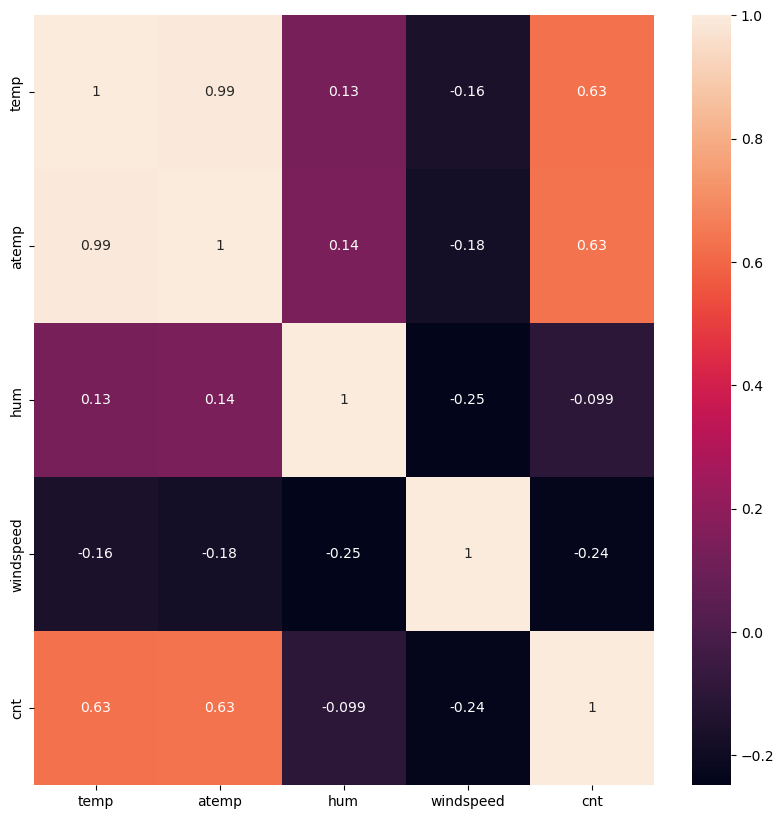

In [40]:
bikes_segment_df = bikes[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
corr = bikes_segment_df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

Cnt is highly correlated with temp and atemp, where temp and atemp are correlated with each other(Will check for VIF at model building steps)

In [43]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_groups,atemp_groups,hum_groups,windspeed_groups
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,9-16,12-19,78-97,8-15
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,9-16,12-19,58-78,15-21
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2-9,4-12,39-58,15-21
3,spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2-9,4-12,58-78,8-15
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,9-16,4-12,39-58,8-15


*Creating dummy variables for categorical columns*

In [45]:
seasons = pd.get_dummies(bikes['season'], drop_first=True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [46]:
dummy_mnth = pd.get_dummies(bikes['mnth'], drop_first=True)
dummy_mnth.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [47]:
bikes.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [48]:
bikes.weekday.value_counts()

Sat      105
Sun      105
Mon      105
Tues     104
Thrus    104
Fri      104
Wed      103
Name: weekday, dtype: int64

In [49]:
dummy_weekday = pd.get_dummies(bikes['weekday'], drop_first=True)
dummy_weekday.head()

,Mon,Sat,Sun,Thrus,Tues,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [50]:
bikes.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [51]:
bikes.weathersit.value_counts()

Clear         463
Mist          246
Light snow     21
Name: weathersit, dtype: int64

In [52]:
dummy_weathersit = pd.get_dummies(bikes['weathersit'], drop_first=True)
dummy_weathersit.head()

,Light snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [53]:
# Concatenate the dummy variables to the bikes dataframe
bikes = pd.concat([bikes,dummy_weekday,dummy_mnth,seasons, dummy_weathersit], axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Mar,May,Nov,Oct,Sep,spring,summer,winter,Light snow,Mist
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,0,0,0
3,spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,0,0


In [54]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   season            730 non-null    object  
 1   yr                730 non-null    int64   
 2   mnth              730 non-null    object  
 3   holiday           730 non-null    int64   
 4   weekday           730 non-null    object  
 5   workingday        730 non-null    int64   
 6   weathersit        730 non-null    object  
 7   temp              730 non-null    float64 
 8   atemp             730 non-null    float64 
 9   hum               730 non-null    float64 
 10  windspeed         730 non-null    float64 
 11  cnt               730 non-null    int64   
 12  temp_groups       730 non-null    category
 13  atemp_groups      730 non-null    category
 14  hum_groups        730 non-null    category
 15  windspeed_groups  730 non-null    category
 16  Mon               730 non-

In [55]:
# Dropping the categorical columns
bikes.drop(['season', 'mnth', 'weekday', 'weathersit', 'temp_groups', 'atemp_groups', 'hum_groups', 'windspeed_groups'], axis = 1, inplace = True)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Sat,...,Mar,May,Nov,Oct,Sep,spring,summer,winter,Light snow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,1,0,0,0,0


In [87]:
df_train, df_test = train_test_split(bikes, train_size = 0.7, random_state=100)

In [88]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [89]:
# Scaling train dataset using minmaxscaler 
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Sat,...,Mar,May,Nov,Oct,Sep,spring,summer,winter,Light snow,Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,1,0,0,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,0,1


In [90]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
plt.figure(figsize=(20, 30))
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

In [92]:
y_train = df_train.pop('cnt')
X_train = df_train

In [93]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)       
rfe = rfe.fit(X_train, y_train)

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Mon', False, 4),
 ('Sat', True, 1),
 ('Sun', False, 3),
 ('Thrus', False, 6),
 ('Tues', False, 5),
 ('Wed', False, 7),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 10),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 8),
 ('Sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light snow', True, 1),
 ('Mist', True, 1)]

In [95]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Sat', 'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Sep', 'spring',
       'summer', 'winter', 'Light snow', 'Mist'],
      dtype='object')

In [96]:
X_train.columns[~rfe.support_]

Index(['Mon', 'Sun', 'Thrus', 'Tues', 'Wed', 'Aug', 'Jun', 'Mar', 'Oct'], dtype='object')

In [97]:
X_train_rfe = X_train[col]

In [98]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          6.28e-188
Time:                        21:51:56   Log-Likelihood:                 525.41
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2973      0.039      7.717      0.0

In [99]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
8,Sat,19.71
9,Sun,18.34
24,spring,10.77
26,winter,9.46
25,summer,8.29
21,Nov,6.79
22,Oct,6.47


In [100]:
# Dropping atemp as p is 0.840 which is > 0.05 and VIF > 5
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [101]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          5.20e-189
Time:                        21:52:03   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2970      0.038      7.722      0.0

In [102]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,97.18
15,spring,5.79
4,temp,4.88
17,winter,3.88
16,summer,3.49
10,Jan,2.38
5,hum,1.97
3,workingday,1.88
9,Feb,1.87
13,Nov,1.82


In [103]:
# Dropping column May as p = 0.186
X_train_new = X_train_new.drop(["May"], axis = 1)

In [104]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          9.80e-190
Time:                        21:52:08   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2868      0.038      7.605      0.0

In [105]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,93.26
14,spring,5.69
4,temp,4.73
16,winter,3.85
15,summer,2.82
10,Jan,2.37
5,hum,1.94
3,workingday,1.88
9,Feb,1.86
12,Nov,1.81


In [106]:
# Dropping column feb as p = 0.119 
X_train_new = X_train_new.drop(["Feb"], axis = 1)

In [107]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.52e-190
Time:                        21:52:17   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2756      0.037      7.433      0.0

In [108]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,89.88
13,spring,5.27
4,temp,4.43
15,winter,3.83
14,summer,2.77
5,hum,1.94
3,workingday,1.88
7,Sat,1.79
11,Nov,1.77
9,Jan,1.68


In [109]:
# Dropping column holiday as p = 0.054 which is > 0.05
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [110]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.20e-190
Time:                        21:53:01   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2690      0.037      7.267      0.0

In [111]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,89.13
12,spring,5.26
3,temp,4.42
14,winter,3.83
13,summer,2.77
4,hum,1.94
10,Nov,1.75
8,Jan,1.68
2,workingday,1.66
6,Sat,1.65


In [112]:
# Dropping column spring as VIF = 5.26, which is > 5
X_train_new = X_train_new.drop(["spring"], axis = 1)

In [113]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          6.82e-190
Time:                        21:53:30   Log-Likelihood:                 516.76
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     494   BIC:                            -933.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2037      0.030      6.784      0.0

In [114]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.71
3,temp,2.33
13,winter,2.09
4,hum,1.91
10,Nov,1.69
8,Jan,1.67
2,workingday,1.66
6,Sat,1.65
15,Mist,1.56
7,Dec,1.48


In [115]:
# Dropping column Nov as p = 0.061, which is > 0.05
X_train_new = X_train_new.drop(["Nov"], axis = 1)

In [116]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.76e-190
Time:                        21:54:32   Log-Likelihood:                 514.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     495   BIC:                            -936.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1959      0.030      6.571      0.0

In [117]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.61
3,temp,2.26
4,hum,1.91
2,workingday,1.66
6,Sat,1.65
8,Jan,1.63
14,Mist,1.56
12,winter,1.55
9,Jul,1.43
11,summer,1.43


In [118]:
# Dropping column Dec as p = 0.183, which is > 0.05
X_train_new = X_train_new.drop(["Dec"], axis = 1)

In [119]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.53e-191
Time:                        21:55:25   Log-Likelihood:                 514.04
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -940.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1907      0.030      6.447      0.0

In [120]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.65
3,temp,2.07
4,hum,1.89
2,workingday,1.65
6,Sat,1.64
13,Mist,1.56
7,Jan,1.55
11,winter,1.53
8,Jul,1.43
10,summer,1.41


All the p values and VIF are in the permissible range, hence model is ready.

*Residual Analysis*

In [121]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

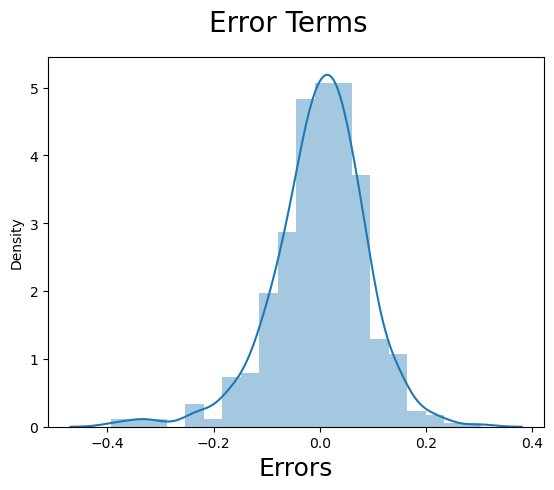

In [122]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

The residuals are following the normally distributed with a mean 0, it is following the assumptions. 

*Prediction on the test set*

In [125]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [126]:
y_test = df_test.pop('cnt')
X_test = df_test

In [127]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'Sat', 'Jan',
       'Jul', 'Sep', 'summer', 'winter', 'Light snow', 'Mist'],
      dtype='object')

In [128]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [129]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [130]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

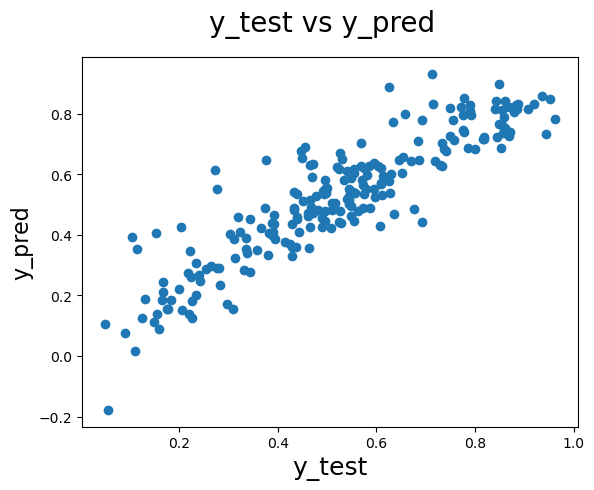

In [131]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  

In [132]:
r2_score(y_true=y_test, y_pred=y_pred)

0.8050619040775491

*Equation of best fitted line:*
$ cnt = 0.1907 + 0.2296 * yr + 0.0526 * workingday + 0.5684 * temp - 0.1643 * hum - 0.1943 * windspeed + 0.0629 * Sat 
      - 0.0401 * Jan -0.0429 * Jul + 0.0909 * Sep + 0.0765 * summer + 0.1251 * winter -0.2425 * Light snow 
      -0.0538 * Mist      $     

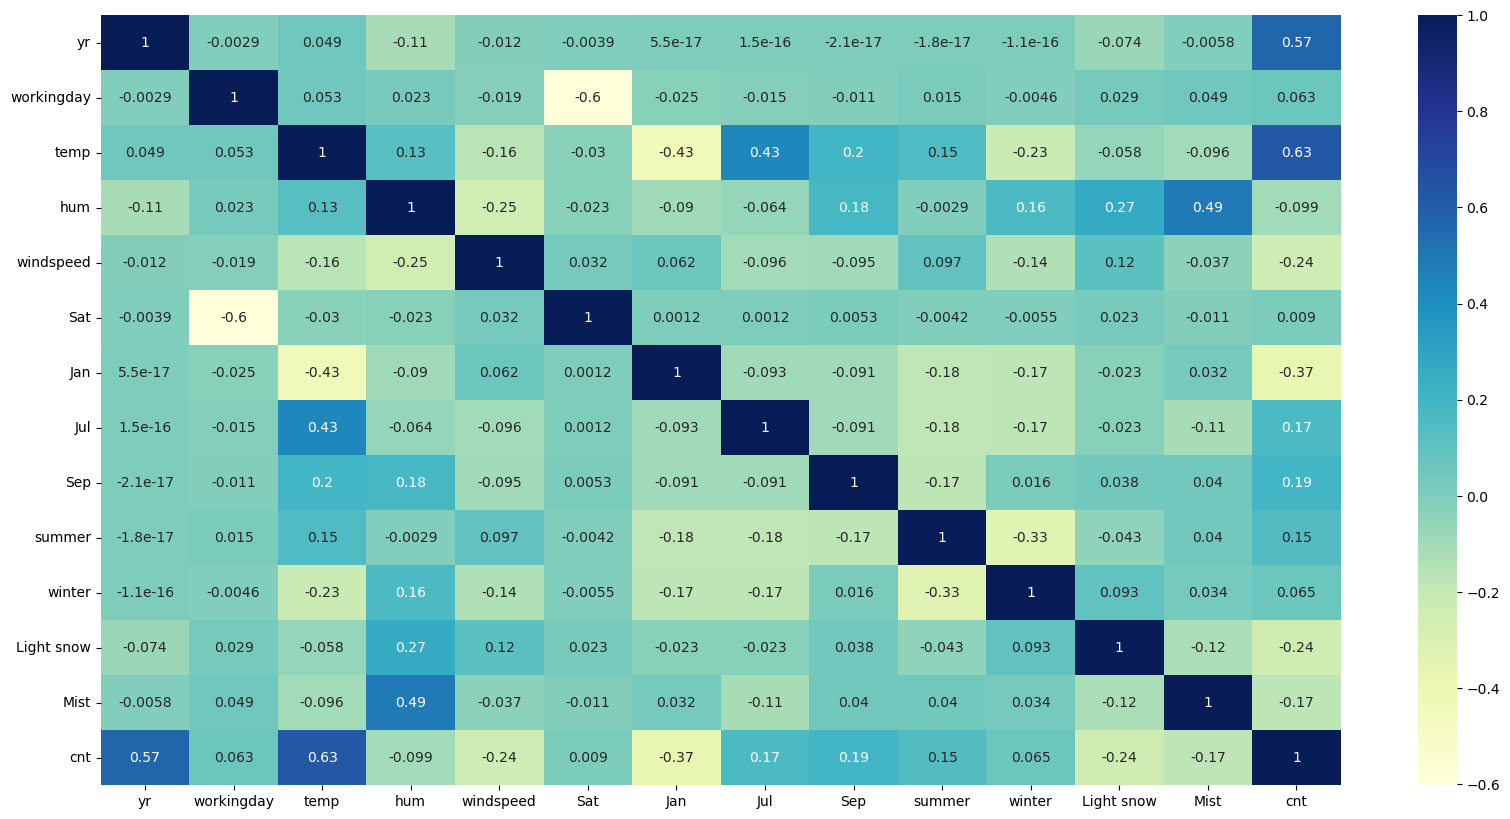

In [150]:
bikes_segment_df = bikes[["yr", "workingday", "temp", "hum", "windspeed", "Sat", "Jan", "Jul", "Sep", "summer", "winter", "Light snow", "Mist", "cnt"]]
corr = bikes_segment_df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot = True, cmap='YlGnBu')
plt.show()